In [1]:
from rdkit import Chem
from syba.syba import SybaClassifier
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
syba = SybaClassifier()
syba.fitDefaultScore()

In [3]:
file = pd.read_excel('All_generated_SMILES_QED_Lipinski.xlsx')

In [4]:
file.head()

,Unnamed: 0,SMILES,molecular_weight,logp,h_bond_donors,h_bond_acceptors,rotatable_bonds,Polar surface area,aromatics rings,Lipinski alerts - to QED calc,Lipinski Rule of 5,QED,0.1_tensor_scaling_prediction,0.2_tensor_scaling_prediction
0,0,CCC(=O)NCC1=CC=NN1S2C=C(C3=CC=CC=C3F)N[NH1]2,335.121609,1.83410,4,5,5,70.98,2,1,1,0.629409,1,0
1,1,CCC(=O)N1CC2C(C#N)(S(=O)C3=CC=CC=N3)CC12,289.088498,1.09228,0,4,3,74.06,1,0,1,0.834638,1,0
2,2,CCC(=O)N1C=2C=CN(C3=NC=NC(C#N)=C3C)C=2S1C,301.099731,2.10890,1,5,2,74.81,2,1,1,0.862074,1,0
3,3,CCC(=O)NCC(C1)=NN=C(C2=CC=C(C)C(CF)=C2)S1,307.115461,2.84012,1,4,5,53.82,1,0,1,0.909168,1,0
4,4,CCC(=O)NCC1=CC=NN1S=2C=C(C3=CC=CC=C3F)NC=2C,346.126360,2.83200,2,4,5,58.95,2,1,1,0.818708,1,0


In [5]:
mols = [Chem.MolFromSmiles(smi) for smi in file['SMILES']]

In [6]:
SYBA_scores = [syba.predict(mol=mol) for mol in mols] 

In [7]:
file['SYBA_score'] = SYBA_scores

In [8]:
file.head()

,Unnamed: 0,SMILES,molecular_weight,logp,h_bond_donors,h_bond_acceptors,rotatable_bonds,Polar surface area,aromatics rings,Lipinski alerts - to QED calc,Lipinski Rule of 5,QED,0.1_tensor_scaling_prediction,0.2_tensor_scaling_prediction,SYBA_score
0,0,CCC(=O)NCC1=CC=NN1S2C=C(C3=CC=CC=C3F)N[NH1]2,335.121609,1.83410,4,5,5,70.98,2,1,1,0.629409,1,0,32.794988
1,1,CCC(=O)N1CC2C(C#N)(S(=O)C3=CC=CC=N3)CC12,289.088498,1.09228,0,4,3,74.06,1,0,1,0.834638,1,0,1.849720
2,2,CCC(=O)N1C=2C=CN(C3=NC=NC(C#N)=C3C)C=2S1C,301.099731,2.10890,1,5,2,74.81,2,1,1,0.862074,1,0,11.632493
3,3,CCC(=O)NCC(C1)=NN=C(C2=CC=C(C)C(CF)=C2)S1,307.115461,2.84012,1,4,5,53.82,1,0,1,0.909168,1,0,-3.031634
4,4,CCC(=O)NCC1=CC=NN1S=2C=C(C3=CC=CC=C3F)NC=2C,346.126360,2.83200,2,4,5,58.95,2,1,1,0.818708,1,0,39.470311


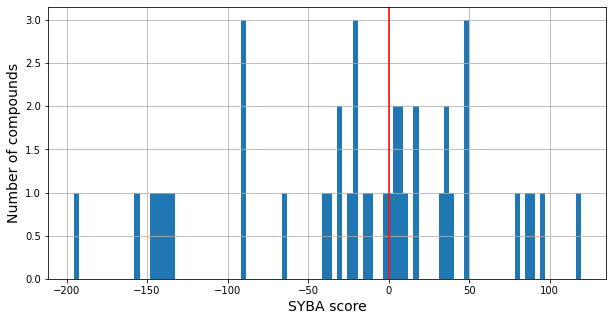

count     42.000000
mean     -19.424737
std       76.358119
min     -195.663108
25%      -57.554667
50%       -7.949103
75%       34.276353
max      119.444502
Name: SYBA_score, dtype: float64
Kurtosis:
-0.334
Skewness:
-0.5026


In [9]:
plt.figure(figsize=(10,5))
plt.hist(file['SYBA_score'],bins=100)
plt.xlabel('SYBA score', fontsize=14)
plt.ylabel('Number of compounds', fontsize=14)
#plt.title('Histogram of SYBA score distribution')
plt.axvline(x=0.0, color='r')
plt.grid(True)
plt.show()

print(file['SYBA_score'].describe())
print('Kurtosis:')
print(round(file['SYBA_score'].kurtosis(),4))
print('Skewness:')
print(round(file['SYBA_score'].skew(),4))

## Select everything that has SYBA score above 0

In [10]:
to_be_docked = file[file['SYBA_score'] > 0]

In [11]:
to_be_docked

,Unnamed: 0,SMILES,molecular_weight,logp,h_bond_donors,h_bond_acceptors,rotatable_bonds,Polar surface area,aromatics rings,Lipinski alerts - to QED calc,Lipinski Rule of 5,QED,0.1_tensor_scaling_prediction,0.2_tensor_scaling_prediction,SYBA_score
0,0,CCC(=O)NCC1=CC=NN1S2C=C(C3=CC=CC=C3F)N[NH1]2,335.121609,1.83410,4,5,5,70.98,2,1,1,0.629409,1,0,32.794988
1,1,CCC(=O)N1CC2C(C#N)(S(=O)C3=CC=CC=N3)CC12,289.088498,1.09228,0,4,3,74.06,1,0,1,0.834638,1,0,1.849720
2,2,CCC(=O)N1C=2C=CN(C3=NC=NC(C#N)=C3C)C=2S1C,301.099731,2.10890,1,5,2,74.81,2,1,1,0.862074,1,0,11.632493
4,4,CCC(=O)NCC1=CC=NN1S=2C=C(C3=CC=CC=C3F)NC=2C,346.126360,2.83200,2,4,5,58.95,2,1,1,0.818708,1,0,39.470311
8,8,CCC(=O)NCC1C(C2=N[NH1]C=C2C(C)(C)O)N=C1N,279.169525,0.19140,4,5,5,116.39,1,0,1,0.615305,1,0,5.243035
11,11,CCC(=O)NCC1=CC=NN1S=2C=C(C3=CC=CC=C3F)[NH1]N=2,333.105959,2.13020,2,5,5,71.31,2,0,1,0.880428,1,1,35.550294
13,13,CC1=CC=CC(C(=O)CC2=NC(Cl)=CC3=CC=CN=C23)=C1,296.071641,4.01702,0,3,3,42.85,3,2,1,0.541441,1,1,79.238291
14,14,CC1=CC=CC(C(=O)NC2=CC(C3=CC=CC=C3)=NO2)=C1,278.105528,3.90232,1,3,3,55.13,3,0,1,0.790067,1,1,119.444502
15,15,CC1=CC=CC(C(=O)CC2=NC(CC3=CC=CO3)=CS2)=C1,297.082350,4.06072,0,4,5,43.10,3,1,1,0.666935,1,0,90.134321
22,22,CC(=O)NC1=CC=CC(=C1)C(=O)N(CC2=CC=CC=C2NC3=NC(...,458.161500,3.53110,3,8,2,135.40,3,0,1,0.534480,1,0,47.431533


## Percentage of structures that pass throught SYBA classification

In [12]:
len(file)

42

In [13]:
len(to_be_docked)

20

In [14]:
print('The percentage of structures that are above given threshold is: '+str(round(len(to_be_docked)*100/len(file),2))+"% in comparision with sturctures that fulfilled QED and Lipinski's Rule of 5.")

The percentage of structures that are above given threshold is: 47.62% in comparision with sturctures that fulfilled QED and Lipinski's Rule of 5.


In [15]:
print('The percentage of structures that are above given threshold is: '+str(round(len(to_be_docked)*100/(200),2))+"% in comparision with all generated structures.")

The percentage of structures that are above given threshold is: 10.0% in comparision with all generated structures.


In [16]:
to_be_docked.to_excel('All_generated_SMILES_SYBA_filtration.xlsx')

## To be docked molecules visialization

In [17]:
from rdkit.Chem import Draw

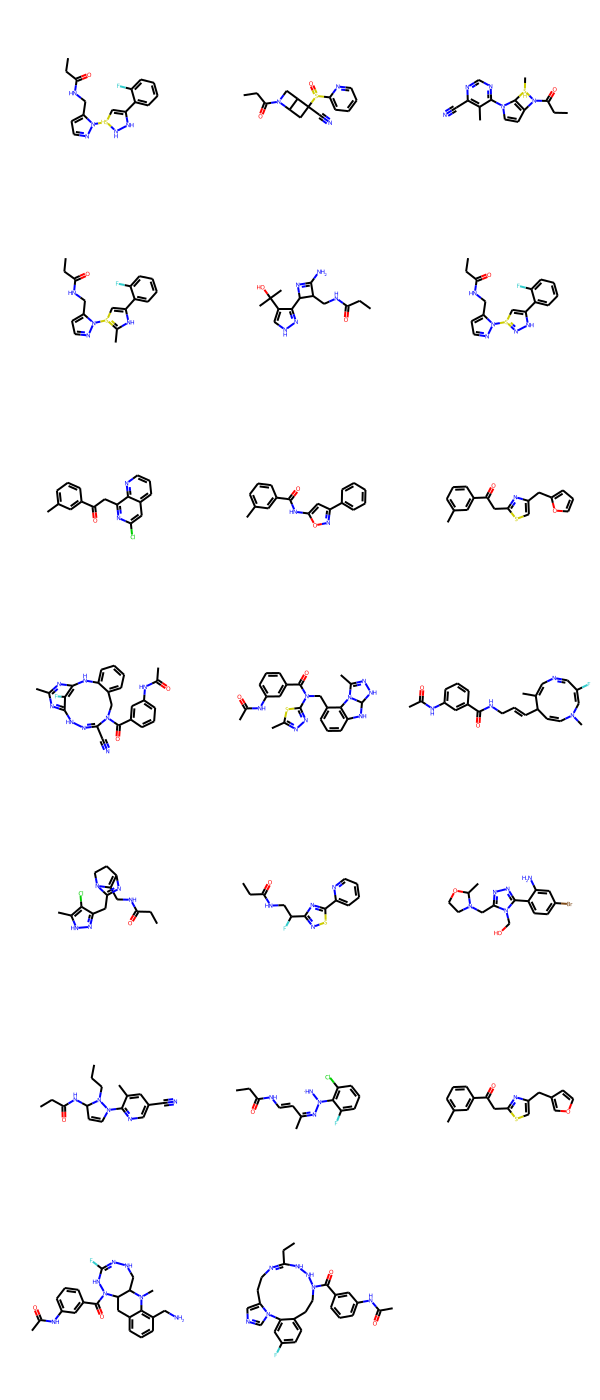

In [18]:
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in to_be_docked['SMILES']], molsPerRow=3)

### Structures that comes from PDB raw files 

In [19]:
from rdkit.Chem import QED

In [20]:
SMILES = ['C1=CC(=C(C(=C1)Cl)C2=NOC(=C2COC3=CC=C(C=C3)C(=O)O)C4=CNC=C4)C(F)(F)F', 'CC(C)C1=C(C=CC(=C1)OC2=C(C=C(C=C2Cl)CO)Cl)OC']

In [21]:
QED_list_QED = []
for smiles in SMILES:
    QED_list_QED.append(QED.qed(Chem.MolFromSmiles(smiles)))

In [22]:
QED_list_QED

[0.35151478199388503, 0.7901975134962079]

In [23]:
SYBA_scores = [syba.predict(mol=Chem.MolFromSmiles(smiles)) for smiles in SMILES] 

In [24]:
SYBA_scores

[45.10530369257825, 71.01899345838119]

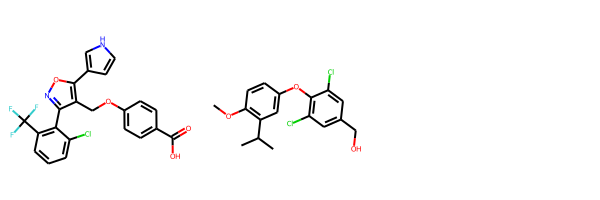

In [25]:
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in SMILES])